#### 几何对象空间关系分析

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon


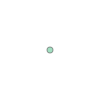

In [4]:
pt1 = Point(1, 0)  ## 点
type(pt1)
pt1


In [5]:
pt2 = Point(3, 2)  ## 点
pt3 = Point(5, 1)  ## 点



5.06449510224598


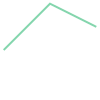

In [6]:
# line = LineString([pt1, pt2, pt3])
line1 = LineString([(1, 0), (3, 2), (5, 1)])
type(line1)
print(line1.length)
line1


<class 'shapely.geometry.polygon.Polygon'>
3.0
9.18760072786364
POINT (3 1)
(1.0, 0.0, 5.0, 2.0)


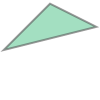

In [7]:
# poly = Polygon([pt1,pt2,pt3])
poly1 = Polygon([(1, 0), (3, 2), (5, 1)])
print(type(poly1))
print(poly1.area)
print(poly1.length)
print(poly1.centroid)
print(poly1.bounds)
poly1


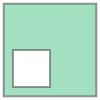

In [8]:
exterior = [(0,0), (0,1), (1,1), (1,0)]
hole = [[(0.1, 0.1), (0.1, 0.5), (0.5, 0.5), (0.5, 0.1)]]
poly2 = Polygon(exterior, holes=hole)  ## 具有空洞的面
poly2


合并

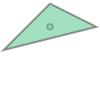

In [9]:
# ### 多个几何面集合
from shapely.geometry import MultiPolygon
# mpoly = MultiPolygon([poly1, poly2])
# mpoly

### 合并几何
from shapely import GeometryCollection
pt_centroid = poly1.centroid
geos = GeometryCollection([poly1, pt_centroid])
geos


投影

In [10]:
import pyproj
from shapely.ops import transform
pt_wgs84 = Point(115, 30)
transformer = pyproj.Transformer.from_crs(4326, 32648, always_xy=True).transform
pt_utm = transform(transformer, pt_wgs84)
print(pt_utm)



POINT (1466939.69224226 3361248.752300655)


求距离

In [11]:
pt = Point(3,0)
dist = pt.distance(pt1)   ## 点与点之间距离
print(dist)
dist = pt.distance(line1)   ## 点到线的距离
print(dist)
dist = pt.distance(poly1)   ## 点到面的距离
print(dist)



2.0
1.4142135623730951
0.48507125007266594


包含分析

In [12]:
print(poly1.contains(pt))
print(poly1.contains(pt_centroid))


False
True


缓冲区分析


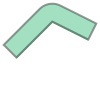

In [13]:
pt1_buffer = pt1.buffer(1, cap_style=1)
mgeo1 = GeometryCollection([pt1, pt1_buffer])
# pt1_buffer
mgeo1

line1_buffer = line1.buffer(1, single_sided=True)
# line1_buffer
mgeo2 = GeometryCollection([line1, line1_buffer])
mgeo2

# poly1_buffer = poly1.buffer(1)
# # poly1_buffer
# mgeo3 = GeometryCollection([poly1, poly1_buffer])
# mgeo3



几何面相交/重叠区计算

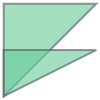

In [14]:
from shapely import intersection
poly1 = Polygon([(0, 0), (0, 2), (2, 2)])
poly2 = Polygon([(0, 0), (0, 1), (2, 1)])
# poly2
# geos = MultiPolygon([poly1, poly2])   ## invalid multipolygon
geos = GeometryCollection([poly1, poly2])
geos


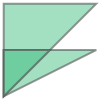

In [15]:
geo_inter = intersection(poly1,poly2)
geos = GeometryCollection([poly1, poly2, geo_inter])
geos


几何面相剪

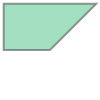

In [16]:
dif = poly1.difference(poly2)
dif


几何面合并

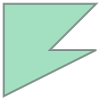

In [17]:
union = poly1.union(poly2)
union


#### 矢量数据空间关系分析 (geopandas)
裁剪

<Axes: >

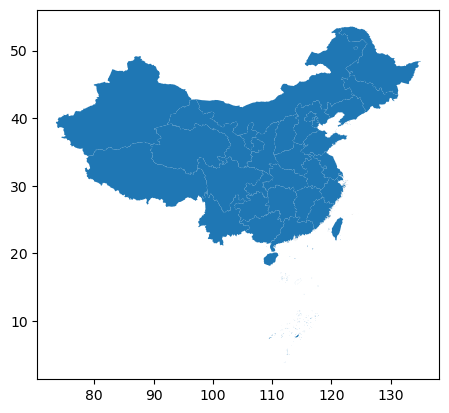

In [20]:
path_vec = 'data/data-base/vector/China-Province/province.shp'
province_gpd = gpd.read_file(path_vec)
province_gpd.plot()


<Axes: >

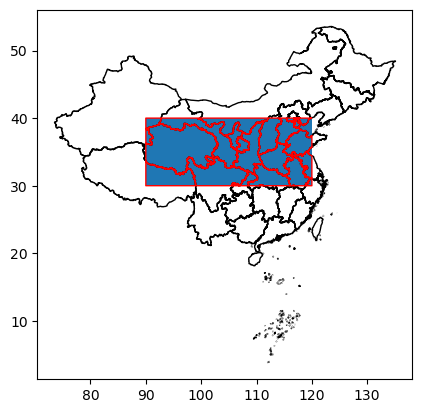

In [39]:
dict = {'name': ['region1'], 
        'geometry': [Polygon([(90,30), (90,40), (120, 40), (120, 30)])]}
region_gpd = gpd.GeoDataFrame(dict, crs="EPSG:4326")
ax = region_gpd.plot()
province_gpd.plot(ax=ax, facecolor='none')
province_clip = province_gpd.clip(region_gpd)
province_clip.plot(ax=ax, facecolor='none', edgecolor='red')


合并

<Axes: >

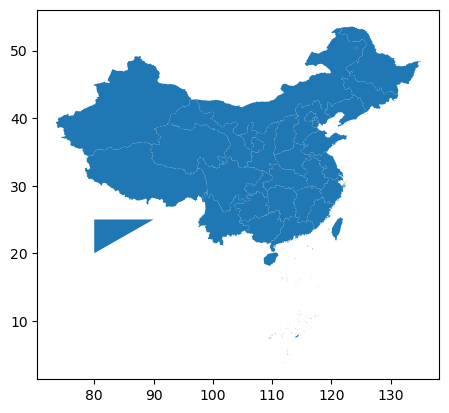

In [47]:
dict = {'name': ['region1'], 
        'geometry': [Polygon([(80,20), (80,25), (90, 25)])]}
region_gpd = gpd.GeoDataFrame(dict, crs="EPSG:4326")
# ax = region_gpd.plot(facecolor='none', edgecolor='red')
# province_gpd.plot(ax=ax, facecolor='none')
union = province_gpd.overlay(region_gpd, how='union')
union.plot()



具体案例：分析选课同学家乡距离昆明的距离，及不同省份选课同学人数。

In [68]:
path_province = 'data/data-base/vector/China-Province/province.shp'


In [69]:
dict = {'student': ['zhang1',       'zhang2',       'zhang3',       'zhang4',       'zhang5'], 
        'geometry': [Point(94, 35), Point(101, 31), Point(102, 25), Point(106, 26), Point(102, 23)]}
student_gdf = gpd.GeoDataFrame(dict, crs="EPSG:4326")
student_gdf


,student,geometry
0,zhang1,POINT (94.00000 35.00000)
1,zhang2,POINT (101.00000 31.00000)
2,zhang3,POINT (102.00000 25.00000)
3,zhang4,POINT (106.00000 26.00000)
4,zhang5,POINT (102.00000 23.00000)


In [70]:
province_gpd = gpd.read_file(path_province)
print(type(province_gpd['geometry'][0]))
province_gpd.head()


<class 'shapely.geometry.polygon.Polygon'>


,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,110000,北京市,100000,中华人民共和国,"POLYGON ((116.89226 39.69491, 116.89227 39.694..."
1,120000,天津市,100000,中华人民共和国,"MULTIPOLYGON (((113.77712 36.63947, 113.78080 ..."
2,130000,河北省,100000,中华人民共和国,"MULTIPOLYGON (((113.56331 36.58910, 113.55295 ..."
3,140000,山西省,100000,中华人民共和国,"POLYGON ((114.04201 40.60888, 114.04441 40.611..."
4,150000,内蒙古自治区,100000,中华人民共和国,"POLYGON ((119.25798 42.22412, 119.25568 42.220..."


<Axes: >

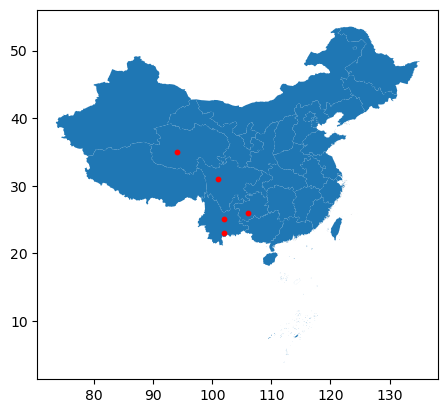

In [71]:
ax = province_gpd.plot()
student_gdf.plot(ax=ax, color='red', markersize=10)


In [72]:
point_kunming = Point(102.712251, 25.040609)
transformer = pyproj.Transformer.from_crs(4326, 32648, always_xy=True).transform
point_kunming_utm = transform(transformer, point_kunming)

for i, geo in enumerate(student_gdf['geometry']):
  geo_utm = transform(transformer, geo)
  dist = point_kunming_utm.distance(geo_utm)
  print(student_gdf.loc[i, 'student'])
  print(dist)


zhang1
1392972.090918346
zhang2
682049.7705099211
zhang3
72065.4050363433
zhang4
347060.91319234436
zhang5
237463.72188568837


In [81]:
for i, geo in enumerate(student_gdf['geometry']):
  print(student_gdf.loc[i, 'student'])
  for j, province in enumerate(province_gpd['geometry']):
    if province.contains(geo):
      print(province_gpd.loc[j, 'pr_name'])


zhang1
青海省
zhang2
四川省
zhang3
云南省
zhang4
贵州省
zhang5
云南省


##### 课后练习：将选课同学与昆明的距离、选课同学省份信息添加到学生数据中，并写出为矢量数据。
